## Step 1 - Import

In [142]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pickle

## Step 2 - Retrieve Train data

In [143]:
with open('x_train.pickle', 'rb') as file:
    data = pickle.load(file)

X = data['data']
X = X.reshape(-1, 28, 28, 1)
y = np.genfromtxt("y_train.csv", delimiter=",", usemask=True)[:,1]

print("X : ", X.shape)
print("y : ", y.shape)

X :  (12223, 28, 28, 1)
y :  (12223,)


## Step 3 - Split Train and Test

In [144]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Step 4 - Preparing the data

In [145]:
print('Before normalization : Min={}, Max={}'.format(X_train.min(), X_train.max()))

x_max = X_train.max()
X_train = X_train / x_max
X_test = X_test / x_max

y_train[y_train == -1] = 0
y_test[y_test == -1] = 0
print('After normalization : Min={}, Max={}'.format(X_train.min(), X_train.max()))

Before normalization : Min=0, Max=255
After normalization : Min=0.0, Max=1.0


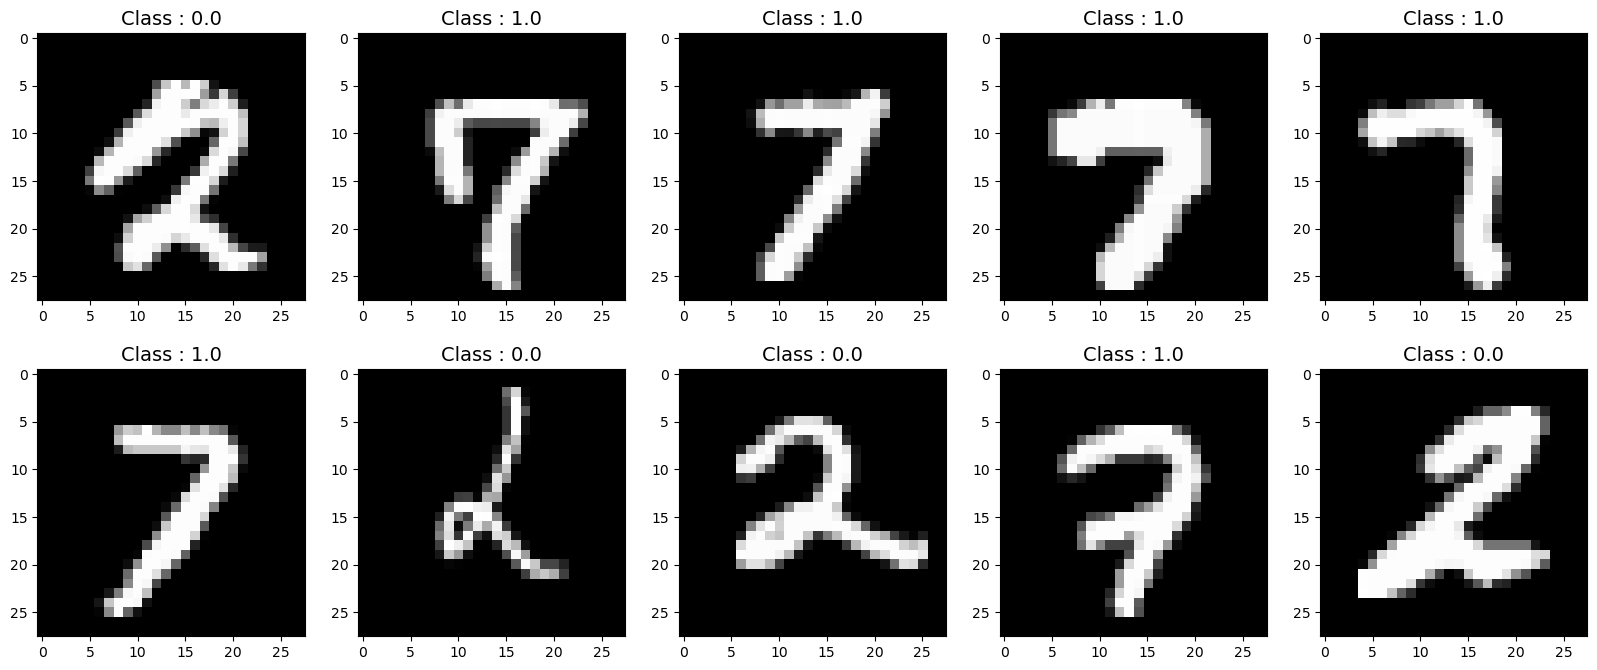

In [146]:
plt.figure(figsize=(20,8))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(X_train[i].reshape(28,28), cmap='gray', vmin=0, vmax=1)
    plt.title(f'Class : {y_train[i]}', fontsize=14)

# Step 5 - Create Model

In [147]:
model = keras.models.Sequential()

model.add(keras.layers.Input((28,28,1)))

model.add(keras.layers.Conv2D(8, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Dropout(0.2))

model.add(keras.layers.Conv2D(16, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Dropout(0.2))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(16, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(1, activation='sigmoid'))

In [148]:
model.summary()

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 26, 26, 8)         80        
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 13, 13, 8)        0         
 g2D)                                                            
                                                                 
 dropout_20 (Dropout)        (None, 13, 13, 8)         0         
                                                                 
 conv2d_15 (Conv2D)          (None, 11, 11, 16)        1168      
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 5, 5, 16)         0         
 g2D)                                                            
                                                                 
 dropout_21 (Dropout)        (None, 5, 5, 16)         

## Step 6 - Train the model

In [149]:
batch_size = 32
epochs = 20

history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2)

Epoch 1/20
245/245 [==============================] - 29s 108ms/step - loss: 0.1680 - accuracy: 0.9416 - val_loss: 0.0428 - val_accuracy: 0.9831
Epoch 2/20
245/245 [==============================] - 27s 109ms/step - loss: 0.0793 - accuracy: 0.9763 - val_loss: 0.0324 - val_accuracy: 0.9903
Epoch 3/20
245/245 [==============================] - 24s 96ms/step - loss: 0.0625 - accuracy: 0.9807 - val_loss: 0.0247 - val_accuracy: 0.9928
Epoch 4/20
245/245 [==============================] - 24s 98ms/step - loss: 0.0538 - accuracy: 0.9833 - val_loss: 0.0300 - val_accuracy: 0.9882
Epoch 5/20
245/245 [==============================] - 24s 98ms/step - loss: 0.0484 - accuracy: 0.9857 - val_loss: 0.0233 - val_accuracy: 0.9939
Epoch 6/20
245/245 [==============================] - 22s 89ms/step - loss: 0.0457 - accuracy: 0.9871 - val_loss: 0.0204 - val_accuracy: 0.9939
Epoch 7/20
245/245 [==============================] - 24s 97ms/step - loss: 0.0437 - accuracy: 0.9879 - val_loss: 0.0202 - val_accurac

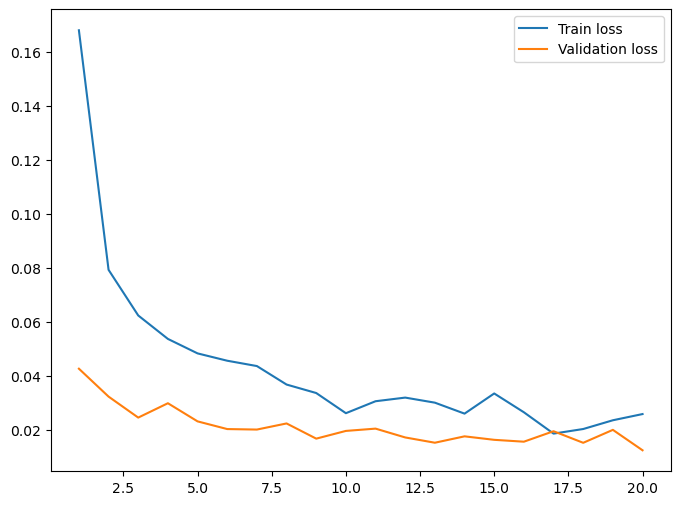

In [150]:
plt.figure(figsize=(8,6))
plt.plot(range(1,epochs+1), history.history['loss'], label='Train loss')
plt.plot(range(1,epochs+1), history.history['val_loss'], label='Validation loss')
plt.legend()


## Step 7 - Evaluate


In [151]:
score = model.evaluate(X_test, y_test)
y_pred = model.predict(X_test)
y_pred = [0 if y < 0.5 else 1 for y in y_pred]

print(f'Test loss : {score[0]:4.4f}')
print(f'Test accuracy : {score[1]:4.4f}')

77/77 [==============================] - 2s 21ms/step
Test loss : 0.0089
Test accuracy : 0.9971


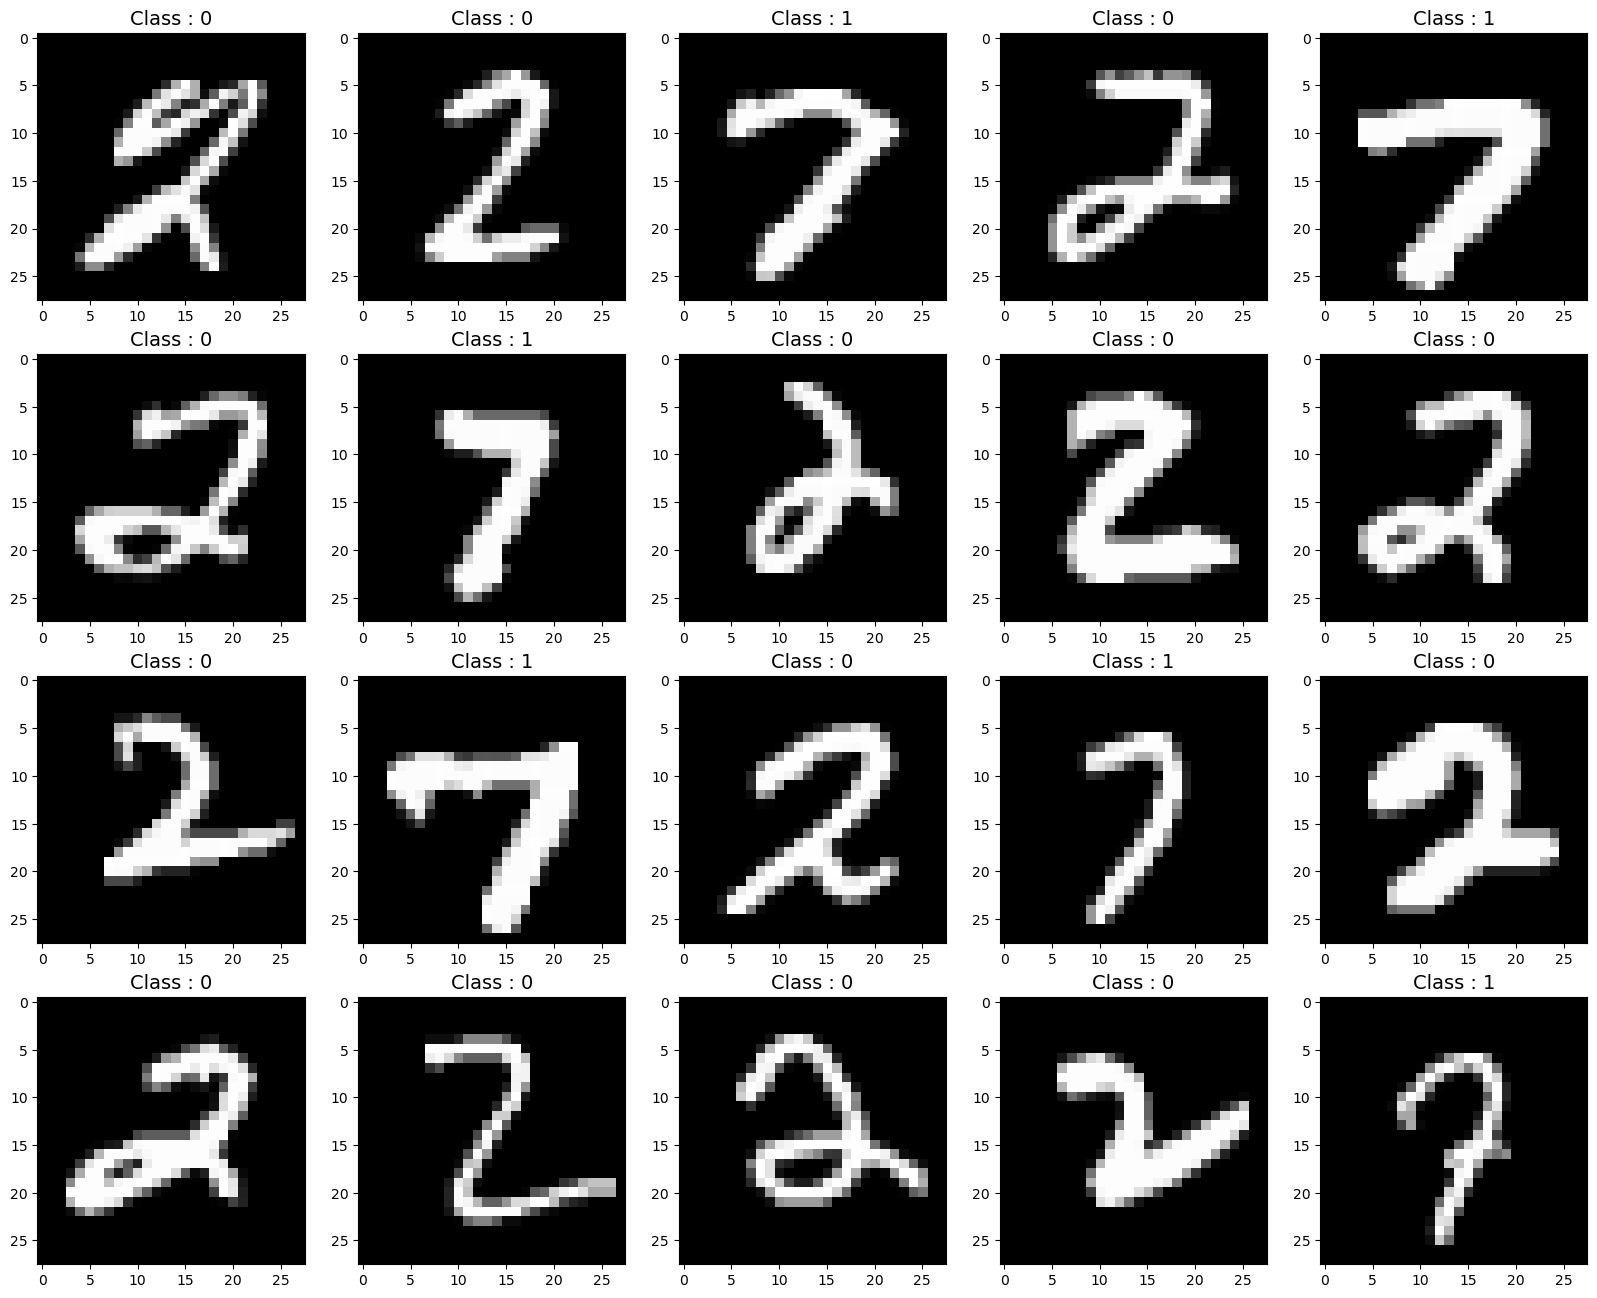

In [152]:
plt.figure(figsize=(20,16))
for i in range(20):
    plt.subplot(4,5,i+1)
    plt.imshow(X_test[i].reshape(28,28), cmap='gray', vmin=0, vmax=1)
    plt.title(f'Class : {y_pred[i]}', fontsize=14)

In [153]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

array([[1219,    5],
       [   2, 1219]], dtype=int64)

## Step 8 - Submission

In [160]:
with open('x_test.pickle', 'rb') as file:
    test = pickle.load(file)

X_test = test['data']
X_test = X_test.reshape(-1, 28, 28, 1)
y_test = model.predict(X_test)
y_test = [-1 if y < 0.5 else 1 for y in y_test]

df = pd.DataFrame({'ID': test['ID'], 'targets': y_test})
df.to_csv("y_test.csv", index=False, header=['ID', "targets"], sep=',', float_format='%d')


65/65 [==============================] - 1s 5ms/step
